✅ Cleaned columns: ['area', 'price']
💰 Predicted price for 3300 sqft = ₹340,672.65


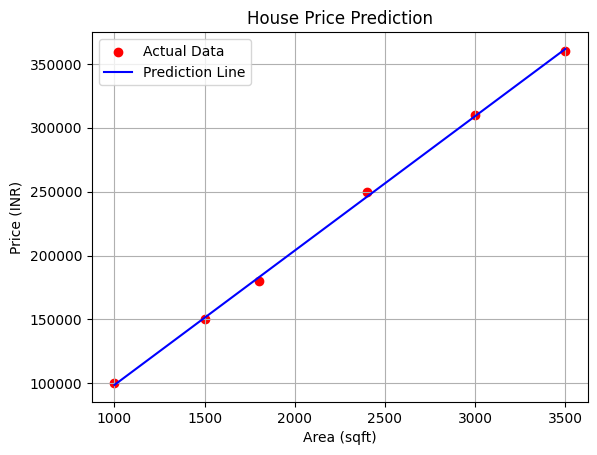

In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Step 1: Read and clean data
# Please make sure you have a 'data.csv' file in the same directory
try:
    data = pd.read_csv("data.csv")
except FileNotFoundError:
    print("❌ Error: 'data.csv' not found. Please make sure the file is in the same directory.")
    # Creating a dummy DataFrame for demonstration
    data = pd.DataFrame({'area': [2600, 3000, 3200, 3600, 4000], 'price': [550000, 565000, 610000, 680000, 725000]})

# Clean column names: remove spaces, make lowercase
data.columns = data.columns.str.strip().str.lower()
print("✅ Cleaned columns:", data.columns.tolist())

# Step 2: Check if required columns are present
if "area" not in data.columns or "price" not in data.columns:
    raise ValueError("❌ Your CSV file must have 'area' and 'price' columns (case-sensitive, no spaces).")

# Step 3: Prepare training data
# Convert X to a numpy array to avoid the UserWarning
X = data[["area"]].to_numpy()
y = data["price"].to_numpy()

# Step 4: Train the model
model = linear_model.LinearRegression()
model.fit(X, y)

# Step 5: Predict price for a given area (e.g., 3300 sqft)
predicted_price = model.predict([[3300]])
print(f"💰 Predicted price for 3300 sqft = ₹{predicted_price[0]:,.2f}")

# Step 6: Plot data and regression line
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, model.predict(X), color='blue', label='Prediction Line')
plt.xlabel("Area (sqft)")
plt.ylabel("Price (INR)")
plt.title("House Price Prediction")
plt.legend()
plt.grid(True)
plt.show()
